In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

Using TensorFlow backend.
C:\Users\mishv\OneDrive\Documents\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\mishv\OneDrive\Documents\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\mishv\OneDrive\Documents\Conda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\mishv\OneDrive\Documents\C

(60000, 28, 28) (60000,)


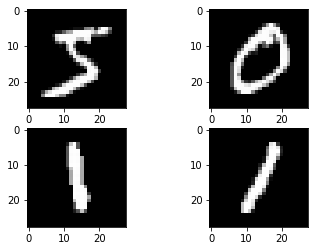

In [2]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[200], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[345], cmap=plt.get_cmap('gray'))
plt.show()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [5]:
batch_size = 128
num_classes = 10
epochs = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras import backend as K

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [9]:
hist = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has been succefully trained.")


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.2323 - accuracy: 0.9285 - val_loss: 0.0528 - val_accuracy: 0.9832
Epoch 2/10
60000/60000 [==============================] - 32s 535us/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0443 - val_accuracy: 0.9860
Epoch 3/10
60000/60000 [==============================] - 33s 551us/step - loss: 0.0472 - accuracy: 0.9854 - val_loss: 0.0454 - val_accuracy: 0.9850
Epoch 4/10
60000/60000 [==============================] - 32s 532us/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0433 - val_accuracy: 0.9847
Epoch 5/10
60000/60000 [==============================] - 33s 549us/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0290 - val_accuracy: 0.9910
Epoch 6/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0265 - val_accuracy: 0.9918
Epoch 7/10
60000/60000 [==============================]

In [10]:
model.save('mnist.h5')
print('The trained weights have been saved.')

The trained weights have been saved.


In [11]:
model.evaluate(x_test, y_test)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 2s 172us/step
Test loss: 0.02858012642698086
Test accuracy: 0.9919000267982483


The number predicted is :  9


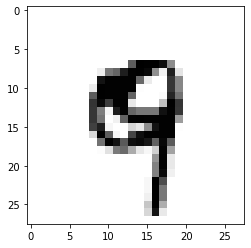

In [12]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('The number predicted is : ', pred.argmax())

In [13]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
import os
import cv2
from PIL import ImageGrab, Image
import numpy as np

model = load_model('mnist.h5')
print('Trained weights loaded')

def get_handle():
    toplist = []
    windows_list = []
    canvas = 0
    def enum_win(hwnd, result):
        win_text = win32gui.GetWindowText(hwnd)
        #print(hwnd, win_text)
        windows_list.append((hwnd, win_text))
    win32gui.EnumWindows(enum_win, toplist)
    for (hwnd, win_text) in windows_list:
        if 'tk' == win_text:
            canvas = hwnd
    return canvas

def preprocessing_image():
    """function to preprocess the image to"""
    image = cv2.imread('test.jpg')
    #print(type(image))
    grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    # cv2.imshow('binarized image', thresh)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(type(contours[0]))
    # print(len(contours[0]))
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
    #cv2.imshow('Contours', image) 
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)        
        # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
        cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]        
        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))        
        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)        
        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digit = (padded_digit)
    return preprocessed_digit

def predict_digit(img):
    """function to predict the digit. 
    Argument of function is PIL Image"""
    img.save('test.jpg')
    preprocessed_image = preprocessing_image()
    # print(type(preprocessed_image))
    # print(preprocessed_image.shape)
    img = preprocessed_image.reshape(1, 28, 28, 1)
    img = img/255.0
    #predicting the digit
    result = model.predict([img])[0]
    os.remove('test.jpg')
    return np.argmax(result), max(result)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Draw", font=("Calibri", 40))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        hwnd = get_handle()
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        x1, y1, x2, y2 = rect
        # print(x1,x2, y1,y2)
        im = ImageGrab.grab((x1+40, y1+40, x2+100, y2+100))
        digit, acc = predict_digit(im)
        print(digit)
        
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()

Trained weights loaded
6
2
0
7
8
